In [9]:
import os
print(os.getcwd())

/Users/user/Desktop/dailyreports


In [10]:
import pandas as pd  #Hmm, NOT tab-separated as blank columns inserted to accommodate long names!!

def text_to_df(file):

    df1= pd.read_csv(file, sep= '\s+',skiprows = 2, header= None, nrows= 24)
    df1.columns= ['hour','geo','biom','biog','shydro','wind','solar','solth']
    df2= pd.read_csv(file,sep= '\s+',skiprows = 30, header= None, nrows= 24)
    df2.columns= ['hour','SRnwbls','nucl','thermal','imports','lhydro']
    df2['load']= df2.hour + df2.SRnwbls + df2.nucl + df2.thermal + df2.imports + df2.lhydro
    df2['netload'] = df2.load - df2.SRnwbls
    df= pd.merge(df1,df2,on= 'hour')
    return df


In [11]:
df= text_to_df('20190114_DailyRenewablesWatch.txt')
print(df.head(2))


   hour  geo  biom  biog  shydro  wind  solar  solth  SRnwbls  nucl  thermal  \
0     1  887   350   230     203  1247      0      0     2917  2263     6842   
1     2  888   346   230     198  1494      0      0     3156  2264     6634   

   imports  lhydro   load  netload  
0     6748    1377  20148    17231  
1     6047    1388  19491    16335  


In [12]:
# THE requests package is much better than antiquated urllib (from DS)
# better to use that!
import requests
url= 'http://content.caiso.com/green/renewrpt/20190114_DailyRenewablesWatch.txt'
r= requests.get(url)# where r is the "Response"
jan14= r.text # is this necessary as we already have a .txt file (not HTML)
#save file w 

jan14file= open('jan14.txt', 'wb') # where wb is write binary: this saves the file (?) 

In [14]:
# So the code runs on the downloaded file, but NOT on the API call using the requests.get() approach

In [16]:
df_caiso_jan14= text_to_df(jan14)#does not exist!!
# df_caiso_jan14= text_to_df(jan14file) # UnsupportedOperation: read
df_caiso_jan14= text_to_df(r) # Error: Invalid file path or buffer object type: <class 'requests.models.Response'>
# DWW TRY STACK OVERFLOW FOR REFERENCES: ALSO LENOVO

FileNotFoundError: File b'01/14/19\t\t\tHourly Breakdown of Renewable Resources (MW)\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\tHour\t\tGEOTHERMAL\tBIOMASS\t\tBIOGAS\t\tSMALL HYDRO\tWIND TOTAL\tSOLAR PV\tSOLAR THERMAL\t\t\t\t\t\t\r\n\t1\t\t887\t\t350\t\t230\t\t203\t\t1247\t\t0\t\t0\t\t\r\n\t2\t\t888\t\t346\t\t230\t\t198\t\t1494\t\t0\t\t0\t\t\r\n\t3\t\t887\t\t349\t\t230\t\t198\t\t1537\t\t0\t\t0\t\t\r\n\t4\t\t887\t\t348\t\t231\t\t199\t\t1574\t\t0\t\t0\t\t\r\n\t5\t\t887\t\t349\t\t229\t\t197\t\t1753\t\t0\t\t0\t\t\r\n\t6\t\t887\t\t348\t\t226\t\t198\t\t1814\t\t0\t\t0\t\t\r\n\t7\t\t888\t\t340\t\t226\t\t201\t\t1765\t\t0\t\t0\t\t\r\n\t8\t\t887\t\t339\t\t225\t\t199\t\t1699\t\t291\t\t0\t\t\r\n\t9\t\t886\t\t341\t\t225\t\t204\t\t1657\t\t1260\t\t0\t\t\r\n\t10\t\t885\t\t339\t\t224\t\t202\t\t1964\t\t1696\t\t0\t\t\r\n\t11\t\t884\t\t333\t\t224\t\t204\t\t1904\t\t1910\t\t0\t\t\r\n\t12\t\t886\t\t328\t\t223\t\t195\t\t1491\t\t1972\t\t0\t\t\r\n\t13\t\t886\t\t333\t\t224\t\t199\t\t1278\t\t1957\t\t0\t\t\r\n\t14\t\t886\t\t354\t\t223\t\t200\t\t1317\t\t1427\t\t0\t\t\r\n\t15\t\t886\t\t366\t\t225\t\t188\t\t1110\t\t1266\t\t0\t\t\r\n\t16\t\t887\t\t366\t\t227\t\t211\t\t840\t\t782\t\t0\t\t\r\n\t17\t\t905\t\t368\t\t227\t\t240\t\t768\t\t123\t\t0\t\t\r\n\t18\t\t905\t\t365\t\t226\t\t325\t\t1068\t\t0\t\t0\t\t\r\n\t19\t\t904\t\t364\t\t226\t\t330\t\t968\t\t0\t\t0\t\t\r\n\t20\t\t905\t\t364\t\t226\t\t322\t\t958\t\t0\t\t0\t\t\r\n\t21\t\t904\t\t362\t\t227\t\t238\t\t821\t\t0\t\t0\t\t\r\n\t22\t\t903\t\t364\t\t226\t\t212\t\t669\t\t0\t\t0\t\t\r\n\t23\t\t902\t\t362\t\t226\t\t190\t\t650\t\t0\t\t0\t\t\r\n\t24\t\t902\t\t361\t\t226\t\t187\t\t627\t\t0\t\t0\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\tHourly Breakdown of Total Production by Resource Type (MW)\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\tHour\t\tRENEWABLES\tNUCLEAR\t\tTHERMAL\t\tIMPORTS\t\tHYDRO\t\t\t\t\t\t\t\r\n\t1\t\t2917\t\t2263\t\t6842\t\t6748\t\t1377\t\t\t\t\t\t\r\n\t2\t\t3156\t\t2264\t\t6634\t\t6047\t\t1388\t\t\t\t\t\t\r\n\t3\t\t2314\t\t2264\t\t7491\t\t5723\t\t1361\t\t\t\t\t\t\r\n\t4\t\t3239\t\t2263\t\t6646\t\t5709\t\t1362\t\t\t\t\t\t\r\n\t5\t\t3415\t\t2263\t\t7049\t\t5732\t\t1493\t\t\t\t\t\t\r\n\t6\t\t3473\t\t2264\t\t7802\t\t6510\t\t1614\t\t\t\t\t\t\r\n\t7\t\t3420\t\t2264\t\t8715\t\t7743\t\t2034\t\t\t\t\t\t\r\n\t8\t\t3640\t\t2263\t\t9423\t\t8467\t\t2302\t\t\t\t\t\t\r\n\t9\t\t4573\t\t2263\t\t9558\t\t8022\t\t2243\t\t\t\t\t\t\r\n\t10\t\t5310\t\t2263\t\t9223\t\t8059\t\t2057\t\t\t\t\t\t\r\n\t11\t\t5459\t\t2262\t\t9218\t\t8129\t\t1981\t\t\t\t\t\t\r\n\t12\t\t5095\t\t2262\t\t9445\t\t8048\t\t2131\t\t\t\t\t\t\r\n\t13\t\t4877\t\t2262\t\t9339\t\t8178\t\t2377\t\t\t\t\t\t\r\n\t14\t\t4407\t\t2263\t\t9418\t\t8365\t\t2331\t\t\t\t\t\t\r\n\t15\t\t4041\t\t2263\t\t9612\t\t8770\t\t1880\t\t\t\t\t\t\r\n\t16\t\t3313\t\t2262\t\t9622\t\t9597\t\t1907\t\t\t\t\t\t\r\n\t17\t\t2631\t\t2262\t\t10450\t\t9564\t\t2546\t\t\t\t\t\t\r\n\t18\t\t2889\t\t2263\t\t11918\t\t9196\t\t2992\t\t\t\t\t\t\r\n\t19\t\t2792\t\t2263\t\t11988\t\t9347\t\t2921\t\t\t\t\t\t\r\n\t20\t\t2775\t\t2263\t\t11197\t\t9742\t\t2759\t\t\t\t\t\t\r\n\t21\t\t2552\t\t2263\t\t10815\t\t9822\t\t2419\t\t\t\t\t\t\r\n\t22\t\t2374\t\t2263\t\t10074\t\t9601\t\t2047\t\t\t\t\t\t\r\n\t23\t\t2330\t\t2264\t\t9757\t\t8254\t\t1517\t\t\t\t\t\t\r\n\t24\t\t2303\t\t2264\t\t8861\t\t7346\t\t1445\t\t\t\t\t\t\r\n' does not exist

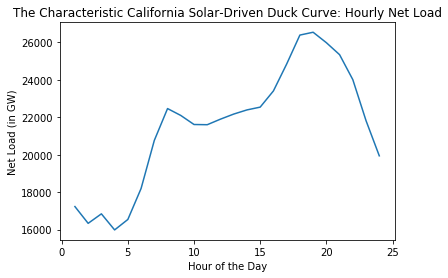

In [17]:
# we can just keep repeating with multiple df's to see them all on the same plot
import matplotlib.pyplot as plt
plt.xlabel('Hour of the Day')
plt.ylabel('Net Load (in GW)')
plt.title('The Characteristic California Solar-Driven Duck Curve: Hourly Net Load')

plt.plot(df['hour'], df['netload'])# need to convert to Numpy array first?, eg via npm= df.values: apparently NOT
plt.show()


In [27]:
# Do we have the urllib library in the Anaconda distribution? It seems so, as no error thrown
from urllib.request import urlretrieve
url= 'http://www.caiso.com/market/Pages/ReportsBulletins/RenewablesReporting.aspx/20190114_DailyRenewablesWatch.txt'
#NB the other daily file with all the charts is not a txt file, so will not be found!!
urlretrieve( url, 'report20190114.txt')


('report20190114.txt', <http.client.HTTPMessage at 0x1177ec390>)

In [28]:
file= 'report20190114.txt'

In [29]:
print(file)#Hmmm: check Hugo tutorial and printing the file, so we can understand how to read it!!!

report20190114.txt


In [20]:
text_to_df('report20190114.txt') # Error tokenizing data. C error: Expected 5 fields in line 6, saw 28
# Hmm: confusing. why line 6? 28 columns seems too large vs. the 8 columns in df1 !?

ParserError: Error tokenizing data. C error: Expected 5 fields in line 6, saw 28


In [24]:
# Now try it for january 12th, with automatic download from the CAISO website (RE-TYPE inverted commas if pasted!!)
url2='http://www.caiso.com/market/Pages/ReportsBulletins/RenewablesReporting.aspx/20190112_DailyRenewablesWatch.txt'

In [ ]:
# paste from above then modify
url2= 'http://www.caiso.com/market/Pages/ReportsBulletins/RenewablesReporting.aspx/20190112_DailyRenewablesWatch.txt'

In [25]:
urlretrieve( url2, 'report20190112.txt') # naming the locally downloaded file for the January 12th text file
# error message went away after retyping the pasted commas!!

('report20190112.txt', <http.client.HTTPMessage at 0x1177eceb8>)

In [30]:
text_to_df('report20190112.txt') # running the function on the January 12th file
# Error tokenizing data. C error: Expected 5 fields in line 6, saw 28

ParserError: Error tokenizing data. C error: Expected 5 fields in line 6, saw 28


In [ ]:
#Whoops: first we must correctly name the long file to download from CAISO
caisonames= [’http://www.caiso.com/market/Pages/ReportsBulletins/RenewablesReporting.aspx/'+ date + 
              /'_DailyRenewablesWatch.txt’ for date in dates] 

In [ ]:
dates= [d.strftime('%Y%m%d') for d in pd.date_range('20181201','20181231')] #try this for month of December to start
dates[0:2]

In [ ]:
filenames= []
for date in dates:
    filenames.append('report'+ date + '.text')
filenames[0:2]

In [ ]:
reportnames= ['report'+ date + '.text' for date in dates] # more succinctly using a list comprehension
reportnames[0:3]

In [ ]:
dfs= []
for report in reportnames:
    frames.append(text_to_df(report))
combined= pd.concat(dfs)
combined.shape
combined.head()
    

In [ ]:
combined.tail()

# Below is a screenshot of DS Code

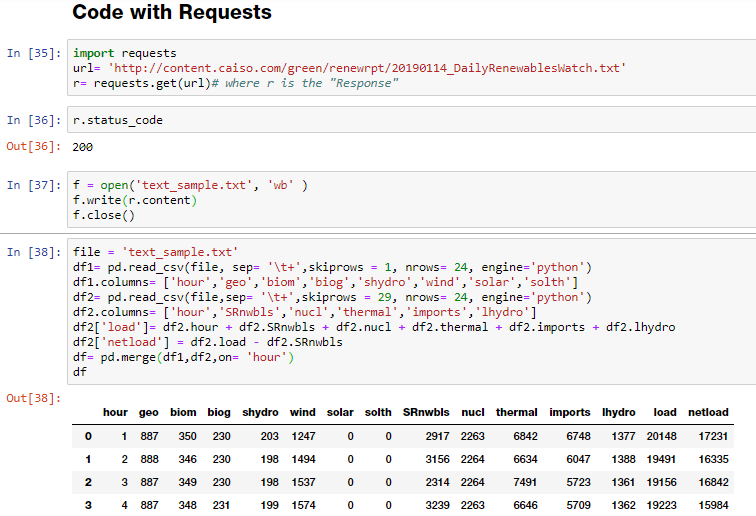

# OLD CODE LISTED BELOW FOR POSSIBLE RECYCLING: IGNORE!

In [ ]:
df_Mar= pd.read_csv('March_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [ ]:
df_Apr= pd.read_csv('April_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [ ]:
df_May= pd.read_csv('May_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [ ]:
df_Jun= pd.read_csv('June_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [ ]:
df_Jul= pd.read_csv('July_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')


In [ ]:
df_Aug= pd.read_csv('August_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')


In [ ]:
df_Sep= pd.read_csv('September_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [ ]:
df_Oct= pd.read_csv('October_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')


In [ ]:
df_Nov= pd.read_csv('November_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [ ]:
frames= [df_Jan,df_Feb,df_Mar, df_Apr, df_May, df_Jun, df_Jul,df_Aug, df_Sep, df_Oct, df_Nov]
df1= pd.concat(frames)

In [ ]:
dfp= df1[df1['LMP_TYPE'] == 'LMP'] # drops the other four price components and reduces data rows by 80%

In [ ]:
dfp['date']= pd.to_datetime(dfp['OPR_DT']) #needed for plotting after the groupby

In [ ]:
dfp.info() # as desired, the date is now the DateTime object (perfect for time series plotting)

In [ ]:
dfp= dfp.drop(['OPR_DT','LMP_TYPE','XML_DATA_ITEM'],axis=1)
dfp.columns= ['hour','price','interval','day']
dfp['weekday']= dfp.day.dt.weekday_name
dfp.index.names= ['date']

dfp.head() # 

In [ ]:
dfp.info()

In [ ]:
# import matplotlib.pyplot as plt # shocking grid instability due to price peaks 
dfp['price'].plot()
# plt.show()

In [ ]:
Feb= dfp.loc['2018-02-01':'2018-02-28'] # if a peak of $1000/MWh occurs only 1%, it still adds $10/MWh to the mean!!!*****
Feb['price'].plot()
# So what is causing the spikes!! $10/MWh versus average of 25:mostly only for 3 months Feb, March, April (but 1% is for the YEAR)
# Easy to quantify frequency by month (could it be unexpected drops in Wind not reflected in Day-Ahead-Market ??)
# while the negative prices are more frequent at 3%, the value is maybe $20/MWh so contribution to the mean is only 
# Review "State of the Market" report by Potomac (ask them this!!)

In [ ]:
Mar= dfp.loc['2018-03-01':'2018-03-31'] # so a peak of $140/MWh is 14 cents
Feb['price'].plot()
        

In [ ]:
April= dfp.loc['2018-04-01':'2018-04-30'] # so a peak of $140/MWh is 14 cents
Feb['price'].plot()

In [ ]:
May= dfp.loc['2018-05-01':'2018-05-31'] # so a peak of $140/MWh is 14 cents
May['price'].plot()

In [ ]:
June= dfp.loc['2018-06-01':'2018-06-30'] # so a peak of $140/MWh is 14 cents
June['price'].plot()

In [ ]:
dfp.price.plot(kind='hist', bins=20) # the outliers at 1000 (50x the normal price) spoil the display


In [ ]:
dfp.boxplot(column= 'price', by= 'hour')


In [ ]:
dfp.columns
dfp.shape

In [ ]:
spikep= dfp[dfp.price > 100]  # so we have 1.2% frequency of spike prices, although optically they dominate the plots!
spikep.shape

In [ ]:
normalp= dfp[(dfp.price < 100) & (dfp.price > 0)] # 
normalp.shape

In [ ]:
negativep= dfp[(dfp.price < 0) & (dfp.price > -30)] # so almost 3% of the time we have a negative price or zero
negativep.shape   # and just four times we have prices more negative than 50

In [ ]:
normalp.boxplot(column= 'price', by= 'hour')  # below uses showfliers=False to exclude the outliers being displayed


In [ ]:
normalp.boxplot(column= 'price', by= 'hour',showfliers=False)  # showfliers=False


In [ ]:
g= normalp.groupby('hour')
g.count()

# This seems to be saying that the three hours in November with the most frequent low prices are from 10am to 3pm
# But these 172 five-minute intervals average only 29 minutes a day of prices below $20/MWh
# Level 1 charger is normally 2 hours of charging: MAY NEED TO INCREASE THRESHOLD TO 3 CENTS/$30/MWh
# BIG QUESTION IS WHETHER THE DIFFERENCE FOR PEAK EVENING PRICES EXCEEDS 25 CENTS/KWH, OF $45/MWh (see p.17 of "Charging Smart")
# Counts can be compared to 30 days x 12 Intervals = 360 Intervals/month

In [ ]:
normalp.groupby('hour').mean()
# The lowest average prices are from 9am to 4pm, which is when Solar is strongest.

In [ ]:
spikep.price.plot(kind='hist', bins=30)

In [ ]:
normalp.price.plot(kind='hist', bins=30)  # No showfliers= False !!

In [ ]:
negativep.price.plot(kind='hist', bins=30) # excludes two outliers below -50 and an additional two below -30

WHAT IS THE QUESTION: NEED TO LIMIT HOURS TO PGE NIGHT RANGE AND COMPARE 24 INTERVALS VS 12! COMPARE PRICE DELTA

In [ ]:
normalp.price.plot(kind='hist', bins=30, cumulative= True)
# Two hours per day average for a Level One EV charger is 24 intervals x 30 days = 720: THRESHOLD must be increased!!!
# Add a horizontal red line at 720 !!
# Define a function that computes the average price (eg still below 2 cents?)

In [ ]:
# this function returns PG&E's designation of Peak (P), Off-Peak (OP), or Standard (S) EV pricing according to the hour of day
def peak(hour): 
    if hour in [24,1,2,3,4,5,6,7]:
        return 'OP'
    elif hour in [15,16,17,18,19,20,21,22]:
        return 'P'
    else:
        return 'S'
    
    

COMPREHENSIVE APPROACH TO PG&E PUBLISHED SCHEDULE
if date is a public holiday (saved as a list for 2018) OR day is weekend (Saturday/Sunday) then Peak is 3-7pm (rest Off Peak)
if day is a weekday (and not a holiday) then:
Peak is 2-9pm (hours 14 to 21)...list(range(14,22)
Partial Peak is 7am to 2pm and 9-11pm: hours 7-14 & 21-23: hour in list(range(7,15)) + list(range(21,24))
Otherwise (ELSE) 'OP' which is Off-Peak

In [ ]:
# need to enter dates as strings and make the dates datetime objects with  .to_datetime() method in pandas
holidays = ['2018-01-01','2018-01-15','2018-02-19','2018-05-28','2018-07-04','2018-09-03','2018-12-25'] #list of public holidays
holidays= pd.to_datetime(holidays) 
holidays # this works OK it seems so the Boolean should match

In [ ]:
# indentation is likely a problem as I mixed tabs and spaces!! Paste this into Spyder to debug? NOT SO! now runs!
# NB at 7am the 7th hour has just concluded, so 'PP' begins with the 8th hour
def PGE(hour,day,weekday): # hour, day, and weekday are columns from the dfp dataframe above (types listed 3 cells below)
    # need to enter dates as strings and make the dates datetime objects with  .to_datetime() method in pandas (works OK above)
    holidays = ['2018-01-01','2018-01-15','2018-02-19','2018-05-28','2018-07-04','2018-09-03','2018-12-25']
    holidays= pd.to_datetime(holidays)
    # list of public holiday
    weekend_peak= list(range(16,20)) # weekend peak is 3-7pm: noon begins hour 13, so 2pm is hour 15, 3pm is hour 16
    weekday_peak= list(range(15,23)) # this corresponds to the weekdays Monday to Friday, first for 2-9pm, for hours 15 to 8
    partial_peak= list(range(8,15)) + list(range(22,24))
    off_peak= list(range(1,8)) + [24] 
    if (day in holidays)|(weekday in ['Saturday','Sunday']):
      if hour in weekend_peak: 
        return 'P'
      else:   
        return 'OP'  
    elif hour in weekday_peak: 
      return'P'   
    elif hour in partial_peak: 
      return 'PP'  
    elif hour in off_peak:
      return 'OP'
    else:
      return 'problem!' 
      # we should never see this condition triggered unless there is a problem (hour 25 when clocks set back!)
# as a sanity check the respective lists added together should equal list(range(1,25)) so we should test with this Boolean!!
PGE(16,holidays[0],'Tuesday')

In [ ]:
list(range(1,8)) + [24]

In [ ]:
PGE(14, holidays[0], 'Monday')

In [ ]:
combined= list(range(15,23)) + list(range(8,15)) + list(range(22,24)) + list(range(1,8)) + [24] 
sorted(combined) # == list(range(1,25)) #  False!!  PROBLEM (Hmm: they match but combined is NOT horizontal but vertical!!)

In [ ]:
list(range(15,22)) + list(range(8,15)) + list(range(22,24)) + list(range(1,8)) + [24] #22

In [ ]:
list(range(7,14)) + list(range(21,22)) # test for Partial Peak ('PP')                    

In [ ]:
list(range(14,21)) # test for Peak ('PP')

In [ ]:
dfp.info()

In [ ]:
this function returns PG&E's designation of Peak (P), Off-Peak (OP), or Standard (S) EV pricing according to the hour of day
#def peak(hour): 
    if hour in [list(range(1,8) + [24]]:
       return 'OP'
   elif hour in [list(range(15,23)]:
        return 'P'
    else:
        return 'S'
   
# list comprehension version? see below

In [ ]:
d= {'OP':list(range(1,8))+ [24], 'P':list(range(15,23)),'S':list(range(8,15)) + list(range(22,24))}
def PGE(hour):
    for key,value in d.items:
        if hour in d.value  #FIX THIS
            return d.key
print(PGE(3))

In [ ]:
peak(1)
peak(16)

In [ ]:
dfp['PGE']= dfp.hour.apply(peak)
dfp.PGE.head()
dfp.PGE.tail()

In [ ]:
dfp.head()

In [ ]:
gPGE= dfp.groupby(['day','PGE'])

In [ ]:
daily_PGE= gPGE.price.mean() # this is hourly data!!
daily_PGE.head(20)

In [ ]:
dfPGE= daily_PGE.to_frame()
dfPGE= dfPGE.sort_values(['day'])
dfPGE.head()

In [ ]:
dfPGE.tail() # 

In [ ]:
dfPGE= dfPGE.unstack('PGE')
dfPGE.head()

In [ ]:
FebPGE = dfPGE.loc['2018-02-01':'2018-02-28'].plot()# so a peak of $140/MWh is 14 cents
FebPGE.plot()

In [ ]:
MarPGE = dfPGE.loc['2018-03-01':'2018-03-31'] # so a peak of $140/MWh is 14 cents
MarPGE.plot()

In [ ]:
AprPGE= dfPGE.loc['2018-04-01':'2018-04-30'] # so a peak of $140/MWh is 14 cents
AprPGE.plot()

In [ ]:
dfPGE.plot() 
# THIS IS A CRITICAL PLOT TO BE REPEATED MONTHLY USING A PANEL APPROACH (can use df.loc() or extract 'month' as a variable)
# Surprises: the highest spikes are not Peak but Standard, 
# peak is evening from 2pm to 8pm!
# Peak seems to have recurring spikes perhaps related to the day of the week?
# on many days the standard price is below the off-peak price Can calculate frequency with a Boolean!
# Standard is from 8 until 2pm so prices are lowered by midday solar

In [ ]:
dfPGE.info()

In [ ]:
dfPGE.columns= ['OP','P','S']
dfPGE.head(3)
dfPGE.tail()

In [ ]:
# BIG QUESTION: EACH DAY FIND THE HIGHEST 100 PRICES AND THEN THE LOWEST 100 PRICES VIA SORT. 
# THEN SUBTRACT THE LOWEST FROM THE HIGHEST, AND SEE IF > $0.25. KEEP GOING UNTIL THIS THRESHOLD IS HIT! 
# SO CHARGE AT WORK FROM 9 TO 10AM AND USE AT HOME TO RUN AC IN PEAK HOURS!!!

In [ ]:
# We need suppose 2 hours on average daily, 24 intervals/day, 720/month. Find for cumulative of 720 the cut-off price
# Then calculate the average price (of course less than cutoff): compute for 720 vs 360, and annnualise cost benefit
# this is the economic value of the Level 2 Charger versus the Level 1.

In [ ]:
# downsample the 5-minute prices to hourly and match up with hourly wind and solar data (Dhavide Course One)